#Predicitng heart disease using machine learning

This notebook looks into using various python based machine learning and data science 
libraries in an attempt to build a machine learning model capable of prediciting 
whether or not someone has heart disease based on their medical attributes


we are going to take the following approach

1. Problem definitions
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


## 1. Problem Definition 
 > Given clinical parameters about a patient, can we predict  whether or not they have 
 heart dieases
 


## 2. Data
the original data cmae from 
thhttps://archive.ics.uci.edu/ml/datasets/heart+diseasee cleavland data from the UCI machine learning Resposition

there is also a version of it available on kaggle
https://www.kaggle.com/code/chingchunyeh/heart-disease-report/notebook



## 3. Evaulation

> if we can reach 95% accuracy at predcitng whether or not a patient has heart diease 
during the proof of concept. we will pursue the project.


## 4. Features 
 This is where you will get different information about each of the features in your data
 
 ** create data dictionary
1. age: The person's age in years
2. sex: The person's sex (1 = male, 0 = female)
3. cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical * angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
4. chol: The person's cholesterol measurement in mg/dl
5. fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
6. thalach: The person's maximum heart rate achieved
7. exang: Exercise induced angina (1 = yes; 0 = no)
8. oldpeak: ST depression induced by exercise relative to rest
9. slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
10. ca: The number of major vessels (0-3)
11. thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

12. target: Heart disease (0 = no, 1 = yes)

## preparing the tools

we are going to use pandas, matplotlib, Numpy for data analysis an manipulation

In [1]:
# Import all the tools we need 

# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# we want our plots to appear inside the notebook

#model from sk-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("data/heart-disease.csv")
df.shape  #(rows , columns)

(303, 14)

## Data exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you are working with

1. what questions(s) are you trying to solve?
2. what kind of data do we have and how do we deal with it?
3. whats missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. how can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
# lets find out how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

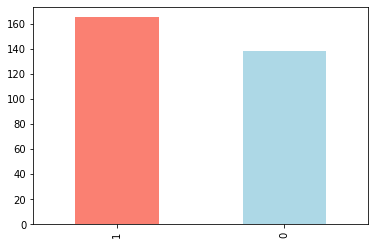

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
## Heart disease frequency accoring to sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

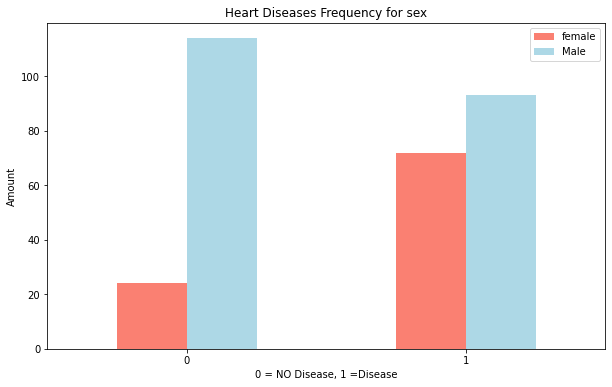

In [12]:
#create a plot of cross tab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10, 6),
                                    color= ["salmon", "lightblue"])
plt.title("Heart Diseases Frequency for sex")
plt.xlabel("0 = NO Disease, 1 =Disease")
plt.ylabel("Amount")
plt.legend(["female", "Male"]);
plt.xticks(rotation=0)

In [13]:
#compare target column with age column
pd.crosstab(df.target, df.age)

age,29,34,35,37,38,39,40,41,42,43,...,65,66,67,68,69,70,71,74,76,77
target,,,,,,,,,,,,,,,,,,,,,
0,0,0,2,0,1,1,2,1,1,3,...,4,3,6,2,1,3,0,0,0,1
1,1,2,2,2,2,3,1,9,7,5,...,4,4,3,2,2,1,3,1,1,0


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

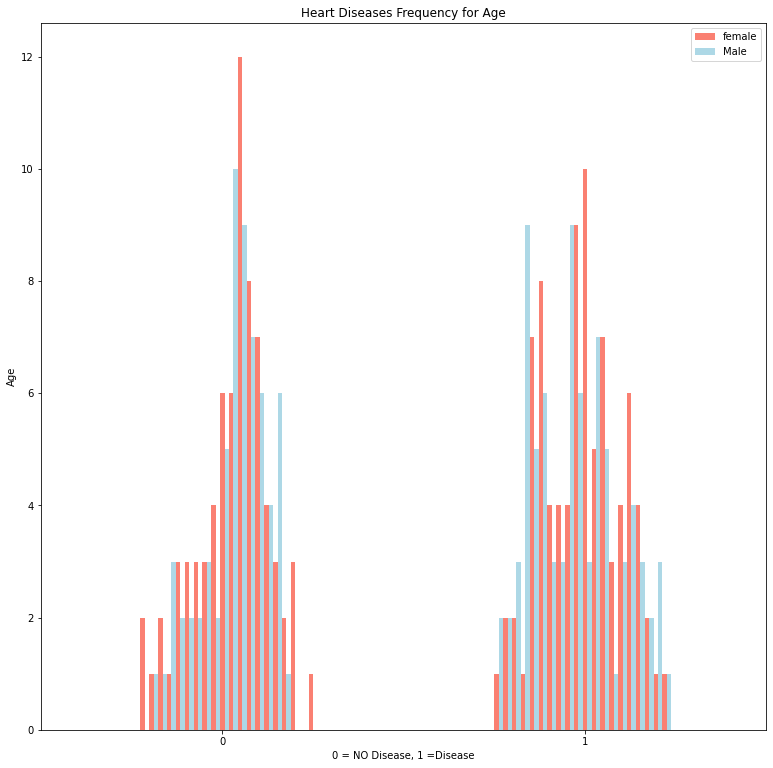

In [14]:
#create a plot of cross tab
pd.crosstab(df.target, df.age).plot(kind="bar",
                                    figsize=(13, 13),
                                    color= ["salmon", "lightblue"])
plt.title("Heart Diseases Frequency for Age")
plt.xlabel("0 = NO Disease, 1 =Disease")
plt.ylabel("Age")
plt.legend(["female", "Male"]);
plt.xticks(rotation=0)

##Age vs Heart rate for heart Disease

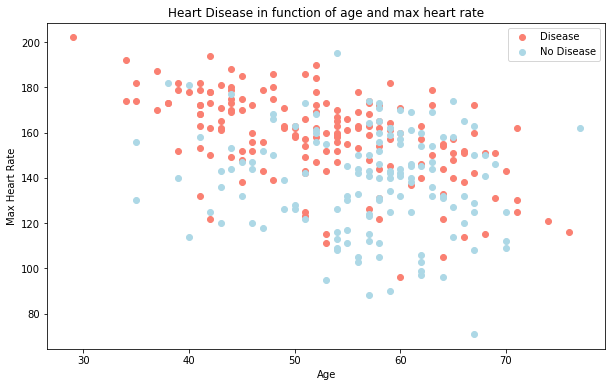

In [15]:
# crete another figure

plt.figure(figsize=(10, 6))

#scatter with postive exapmles
plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c="salmon")
#scatter with negative example
plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");

#add some helpul info
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"])

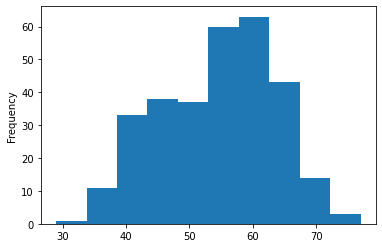

In [16]:
#check the distributuion of the age column with histogram
df.age.plot.hist();

### Heart disease frequency per Chest pain type
3. chest pain type
  1. Typical angina: Chest pain related decrease blood supply to the heart
  2. Atypical angina:  chest pain not related to heart
  3. non-aninal pain: typically esophageal spasms(non heart related)
  4. Asymptomatic: chest pain not showing signs of disease

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


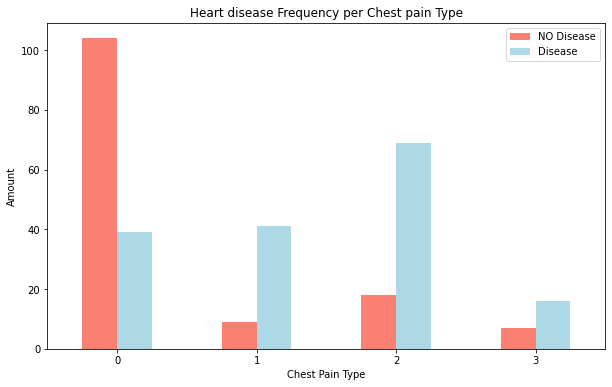

In [18]:
#make the cross tab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                    figsize= (10, 6),
                                    color=["salmon", "lightblue"])

#add some communictions
plt.title("Heart disease Frequency per Chest pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["NO Disease", "Disease"])
plt.xticks(rotation=0);

In [19]:
#Mkae a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


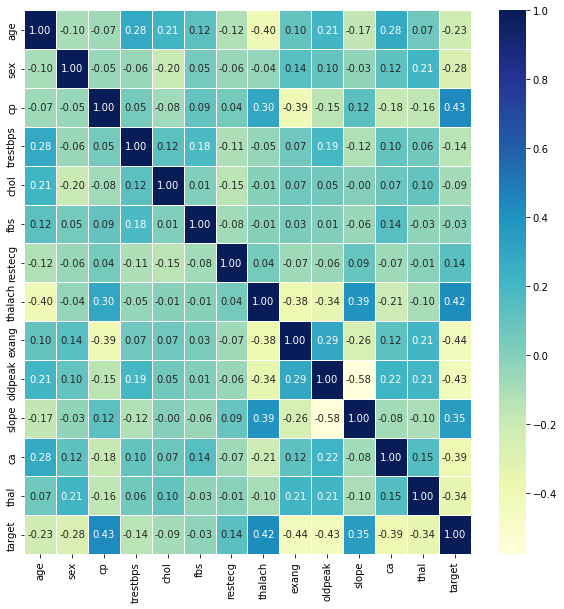

In [20]:
#lets make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax= plt.subplots(figsize=(10,10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");
#what is correlation analysis:
# correlation: Negative correlation= a relationship between two variables in which 
# one variable increases as the other decreases         
## a higher postive value means a potential postive correlation
## a higher negative value means a potential negative correlation or decrease

#5.Modelling

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [22]:
#split data into x and y
x = df.drop("target", axis=1)
y= df["target"]


In [23]:
#split data into train and test set
np.random.seed(42)

#split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

now we have gotten our data split into train and test set 
time to build a machine learning Model

we will train it (find patters on the training set).set

and test it use the patterns its found on the test set

we are going to try 3 different machine learning models

1. logistic Regression
2. k-nearest neighbours classifier
3. Random forest classifier

In [24]:
#put models in a dicitonary
models = {"logistics regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#create a function to fit score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different scikit-learn machine learning models
    x_train : training data (no labels)
    x_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    #set random seed 
    np.random.seed(42)

    #make a dictionary to keep model score
    model_scores = {}

    #loop through models
    for name, model in models.items():
        #fit the model to the data
        model.fit(x_train, y_train)
        #Evaluate the model and append the score model_score
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [25]:
model_scores = fit_and_score(models = models,
                            x_train = x_train,
                            x_test = x_test,
                            y_train = y_train,
                            y_test = y_test )

model_scores

C:\Users\JOHNKENNEDY\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'logistics regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## model comparison

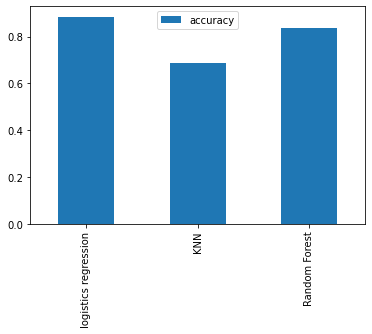

In [26]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we have got a baseline model and we know a models first predicitions 
aint always what we should base our next steps off.
what should i do??

lets look at the following:
* Hypyterparameter tunning
* feature importance
* confusion matrix
* cross-validation
* precision
* Recall
* F1-score
* classification report
* ROC curve
* Area under the curve (AUC)


## HyPERPARAMETER TUNNING BY HAND

In [27]:
#lets tune KNN

train_scores = []
test_scores = []

#create a list of different values for n_neighbours
neighbors = range(1, 21)

#setupknn instance
knn = KNeighborsClassifier()

#loop through different n_neighbours
for i in neighbors:
    knn.set_params(n_neighbors=i)

    #fit the algorithm
    knn.fit(x_train, y_train)

    #update the trainning score list
    train_scores.append(knn.score(x_train, y_train))

    #update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [28]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [29]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41% 


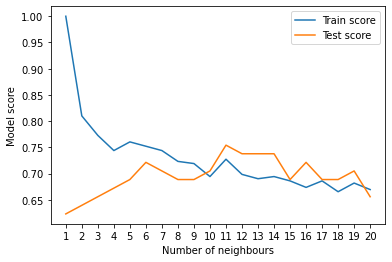

In [30]:
plt.plot(neighbors, train_scores, label= "Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model score")
plt.legend()


print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}% ")

## HYPERPARAMETER TUNING WITH RANDOMIZEDSEARCH CV

we are going to tune:
*  LogisticsRegression()
* RandomForestClassififer

..... using RandomiedSearchCV

In [31]:
# Create  a hyperparameter  grid logisticRegression
log_reg_grid = {#"C": np.logspace(-3, 3, 30),
'C' : np.logspace(-4, 4, 20), 
'solver': ['liblinear']}

#Create a hyperparameter grid for Randomclassifier
rf_grid = {"n_estimators" : np.arange(10, 1000, 50),
            "max_depth": [None, 3, 5, 10],
            "min_samples_split": np.arange(2, 20, 2),
            "min_samples_leaf": np.arange(1, 20, 2)}

Now we have got hyperparameter grid setup for each of our model, let's tune them
using RandomizedSearchCV.

In [32]:
#Tune logistic result
np.random.seed(42)

#setup random hyperparameter search for logisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv=5,
                                n_jobs=1,
                                n_iter=20,
                                verbose=True)

#fit random hyperparameter search model for logisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=1,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(x_test, y_test)

0.8852459016393442

Now we have tuned LogisticRegression() lets do the same for RandomForestClassifier

In [35]:
#setup random seed
np.random.seed(42)

#set random hyperparater search for Randomforestclassifier
rs_rf = RandomizedSearchCV( RandomForestClassifier(),
                            param_distributions= rf_grid,
                            cv=5,
                            n_iter=20,
                            verbose=True )

#fit random hyperparamter search model for randomforestclassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
#find the best hyperparameter
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [37]:
#evaluate the randomied search RandomForestclassifier model
rs_rf.score(x_test, y_test)

0.8688524590163934

#hyperparametrs tunning with gridsearchCV

since our LogisticRegression model provides the best score so far, we will try 
and improve them again using GridSearchCV...

In [38]:
#Different hyperparametrs for our logisticRegression model
log_reg_grid = {#"C": np.logspace(-3, 3, 30),
'C' : np.logspace(-4, 4, 30), 
'solver': ['liblinear']}


#setup grid hyperparameter search for logisticsRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)


#fit grid hyperparamter search model
gs_log_reg.fit(x_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
#check the best parameter
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
#Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

##Evalating our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score 
* Confusion matrix
* precision_score
* recall_score
* f1_score

And it would be great if cross-validation was used where possible.


To make comparisons and evalute our trained model, first we need to make predictions


In [41]:
#make predictions with tunned model
y_preds =gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [42]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

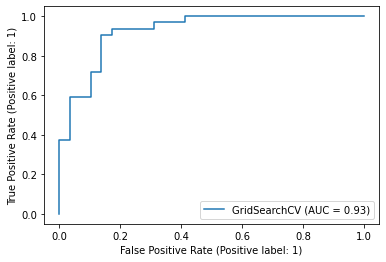

In [43]:
#plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, x_test, y_test)

In [44]:
#confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


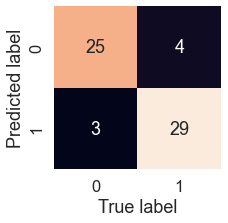

In [45]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plot a nice looking confusion matrix using Seaborn's heatmap()
    
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)

    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)


plot_conf_mat(y_test, y_preds)

Now we have got a ROC curve, an AUC  and confusion matrix, lets get a classification_report as
well as cross-validated precision, recall and f1_score

In [46]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



##calculate evaluation metric using cross-vaidation

we are goint to calculate precision_score,recall_score and f1_scoreof our model 
using cross-validation and to do that we will be using cross_val_score()

In [47]:
#check best hyperparameters 
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [48]:
#create a new classifier with best parameter
clf = LogisticRegression(C= 0.20433597178569418, solver= 'liblinear')

In [49]:
#cross-validated accuracy
cv_acc = cross_val_score(clf, x, y,
                        cv=5,
                        scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [50]:
cv_acc= np.mean(cv_acc)
cv_acc

0.8479781420765027

In [51]:
#cross-validated precision
cv_precision = cross_val_score(clf, x, y,
                        cv=5,
                        scoring="precision")

cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [52]:
#cross validated recall
#cross-validated precision
cv_recall = cross_val_score(clf, x, y,
                        cv=5,
                        scoring="recall")

cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [53]:
#cross-validated F1-score
#cross-validated precision
cv_f1_score = cross_val_score(clf, x, y,
                        cv=5,
                        scoring="f1")

cv_f1_score = np.mean(cv_precision)
cv_f1_score

0.8215873015873015

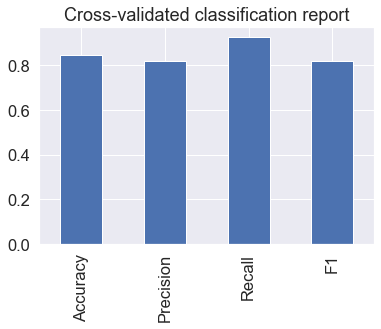

In [54]:
#visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1_score},
                           index=[0])


cv_metrics.T.plot.bar(title= "Cross-validated classification report",
                    legend=False);                

### Feature importance

feauture importance is another way of asking, "which features contribted most
to the outcome of the model and how did they contribute?"


finding feature importance is different for each machine learning model.one way to find feauture importance is to search for "(MODEL NAME) feauture importance"

lets find the future importance for logisticsregression model

In [55]:
#fit an instance of logisticsRegression
gs_log_reg.best_params_

clf = LogisticRegression(C=0.20433597178569418, solver = "liblinear")
clf.fit(x_train, y_train);

In [56]:
#check coeff_
clf.coef_

array([[ 0.00316728, -0.86044636,  0.66067051, -0.01156993, -0.00166374,
         0.04386116,  0.31275829,  0.02459361, -0.60413071, -0.56862818,
         0.45051626, -0.63609888, -0.67663381]])

In [57]:
#match coef's of features to coulmns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003167278990517721,
 'sex': -0.8604463644626569,
 'cp': 0.6606705054012705,
 'trestbps': -0.011569931335912368,
 'chol': -0.0016637438070300692,
 'fbs': 0.04386116284216185,
 'restecg': 0.31275829369964075,
 'thalach': 0.02459361297137234,
 'exang': -0.6041307139378419,
 'oldpeak': -0.5686281825180214,
 'slope': 0.450516263738603,
 'ca': -0.6360988840661891,
 'thal': -0.6766338062111971}

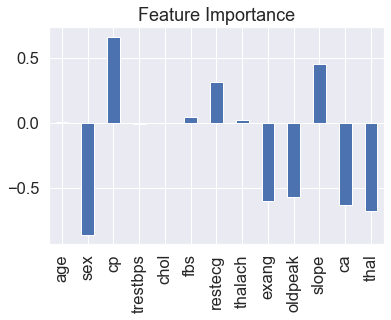

In [58]:
#visualize feature importance
feature_df= pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title= "Feature Importance", legend=False);

In [59]:
pd.crosstab(df["sex"], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [60]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

## 6. experimentation

if you hsvnt hit your evaluation metric yet..... ask youself

* could you collect more data?
* could you try a better model? like catboost or XGBoost?
* could we improve the current models? (beyond what we have done so far)
* if your model is good enough (you have hit your evaluation metric)
how would you export it and share it with others?